<a href="https://colab.research.google.com/github/rahul21-7/Learning-ML/blob/main/pytorch_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import torch
from torch import nn
import matplotlib.pyplot as plt

In [45]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(
    n_samples = n_samples,
    shuffle = True,
    noise = 0.03,
    random_state = 67,
    factor = 0.2
)

circles = pd.DataFrame({"X1":X[:, 0],
                        "X2":X[:, 1],
                        "label": y})

circles

,X1,X2,label
0,0.076725,0.231592,1
1,0.175660,-1.000523,0
2,-0.164017,0.138923,1
3,0.100553,-0.187689,1
4,0.021068,0.247504,1
...,...,...,...
995,0.990426,0.102278,0
996,0.855938,-0.549445,0
997,-0.231781,0.079827,1
998,-0.151044,-0.168992,1


In [46]:
circles.label.value_counts()

,count
label,
1,500
0,500


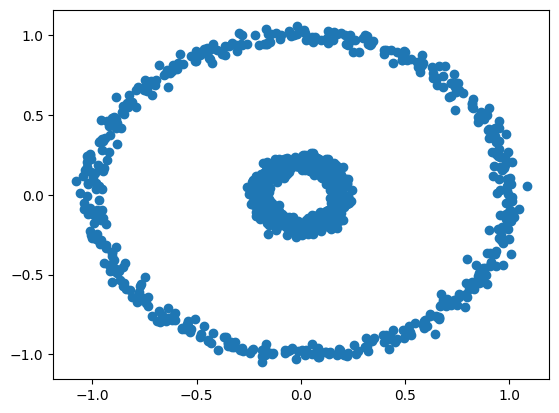

In [47]:
plt.scatter(circles['X1'], circles["X2"])

In [48]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.0767,  0.2316],
         [ 0.1757, -1.0005],
         [-0.1640,  0.1389],
         [ 0.1006, -0.1877],
         [ 0.0211,  0.2475]]),
 tensor([1., 0., 1., 1., 1.]))

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

len(X_train), len(X_test), len(X_test), len(y_test)

(800, 200, 200, 200)

In [86]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=16)
    self.layer_2 = nn.Linear(in_features=16, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))


model_0 = CircleModel()
model_0

CircleModel(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=1, bias=True)
)

In [87]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [98]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

In [99]:
y_logits = model_0(X_test)
# y_logits = y_logits.squeeze()|
y_logits[:5], y_logits.shape

(tensor([[-0.1939],
         [-0.1482],
         [-0.1508],
         [-0.0191],
         [-0.0771]], grad_fn=<SliceBackward0>),
 torch.Size([200, 1]))

In [100]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4517],
        [0.4630],
        [0.4624],
        [0.4952],
        [0.4807]], grad_fn=<SliceBackward0>)

In [101]:
y_preds = torch.round(y_pred_probs)
# y_preds.shape, y_test.shape
y_preds.squeeze(), y_test

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>),
 tensor([1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        

In [110]:
torch.manual_seed = 67
epochs = 100

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_preds, y_train)
  accuracy = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {accuracy}")


Epoch: 0 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 10 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 20 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 30 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 40 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 50 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 60 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 70 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 80 | Loss: 0.6939224004745483 | Accuracy: 50.375
Epoch: 90 | Loss: 0.6939224004745483 | Accuracy: 50.375


In [117]:
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_2(self.relu(self.layer_1(x)))

In [121]:
epochs = 100
torch.manual_seed = 67
model_1 = CircleModelV2()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  accuracy = accuracy_fn(y_train, y_preds)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_accuracy = accuracy_fn(y_test, test_preds)

  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {accuracy} | Test Loss: {test_loss} | Test Accuracy: {test_accuracy}")

Epoch: 0 | Loss: 0.7332656383514404 | Accuracy: 50.5 | Test Loss: 0.7330380082130432 | Test Accuracy: 48.0
Epoch: 10 | Loss: 0.7120322585105896 | Accuracy: 46.75 | Test Loss: 0.7111876010894775 | Test Accuracy: 44.0
Epoch: 20 | Loss: 0.6985263824462891 | Accuracy: 43.75 | Test Loss: 0.6978448629379272 | Test Accuracy: 43.5
Epoch: 30 | Loss: 0.6883355975151062 | Accuracy: 42.625 | Test Loss: 0.6883026361465454 | Test Accuracy: 43.0
Epoch: 40 | Loss: 0.6796817183494568 | Accuracy: 42.125 | Test Loss: 0.6805912852287292 | Test Accuracy: 42.5
Epoch: 50 | Loss: 0.6717832088470459 | Accuracy: 42.625 | Test Loss: 0.6738092303276062 | Test Accuracy: 43.0
Epoch: 60 | Loss: 0.6642951965332031 | Accuracy: 43.125 | Test Loss: 0.6675065755844116 | Test Accuracy: 43.5
Epoch: 70 | Loss: 0.6570070385932922 | Accuracy: 51.74999999999999 | Test Loss: 0.6614392995834351 | Test Accuracy: 55.00000000000001
Epoch: 80 | Loss: 0.6498010158538818 | Accuracy: 78.375 | Test Loss: 0.6554505228996277 | Test Accura